In [66]:
import pandas as pd
import tensorflow as tf

In [67]:
(X_train,y_train), (X_test,y_test) = tf.keras.datasets.mnist.load_data('/home/prakhyath/ml/Notebooks/datasets/mnist.npz')

In [68]:
X_train.shape

(60000, 28, 28)

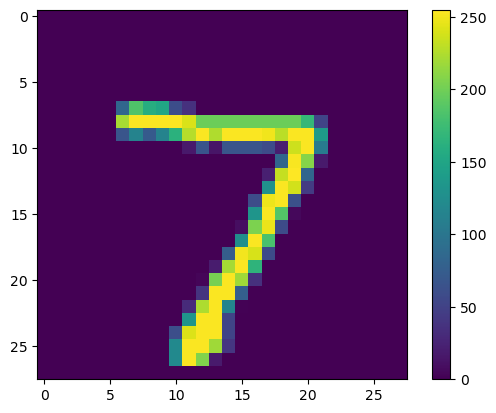

In [69]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(X_test[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [71]:
X_train.shape 

'''
(60000, 28, 28):
1. 60000 instances in X_train. Each instance consists a 28 x 28 matrix
'''


'\n(60000, 28, 28):\n1. 60000 instances in X_train. Each instance consists a 28 x 28 matrix\n'

In [72]:
X_train = X_train.reshape(-1,28*28)
X_train = X_train / 255.0 #shifting the values between 0 to 1 range, NORMALIZATION
X_test = X_test.reshape(-1,28*28)
X_test= X_test / 255.0

In [74]:
X_train.shape

(60000, 784)

In [75]:
y_train[0]

5

In [76]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [77]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [78]:
X_train.shape

(60000, 784)

In [79]:
tf.random.set_seed(42)
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units=100, input_dim=784, activation='softmax'))
model.add(tf.keras.layers.Dense(units=50, activation='softmax'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer=tf.optimizers.Adam(learning_rate=0.1), 
              metrics=['accuracy'])
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 100)               78500     
                                                                 
 dense_16 (Dense)            (None, 50)                5050      
                                                                 
 dense_17 (Dense)            (None, 10)                510       
                                                                 
Total params: 84060 (328.36 KB)
Trainable params: 84060 (328.36 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
import timeit
startTime = timeit.default_timer()
history = model.fit(X_train, y_train, 
                batch_size=100,
                epochs=15, 
                validation_data=(X_test, y_test))
elapsedTime = timeit.default_timer() - startTime
print("Time taken for training the Network: ", elapsedTime)

#Final evaluation of the model

scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Errro: %.2f%%" % (100-scores[1]*100))

Epoch 1/15
600/600 [==============================] - 2s 3ms/step - loss: 0.9372 - accuracy: 0.6436 - val_loss: 0.8231 - val_accuracy: 0.6661
Epoch 2/15
600/600 [==============================] - 1s 2ms/step - loss: 0.8274 - accuracy: 0.6690 - val_loss: 0.8041 - val_accuracy: 0.6762
Epoch 3/15
600/600 [==============================] - 1s 2ms/step - loss: 0.7968 - accuracy: 0.6808 - val_loss: 0.7997 - val_accuracy: 0.6791
Epoch 4/15
600/600 [==============================] - 2s 3ms/step - loss: 0.7898 - accuracy: 0.6883 - val_loss: 0.7400 - val_accuracy: 0.7033
Epoch 5/15
600/600 [==============================] - 2s 3ms/step - loss: 0.7829 - accuracy: 0.7023 - val_loss: 0.7883 - val_accuracy: 0.6928
Epoch 6/15
600/600 [==============================] - 2s 3ms/step - loss: 0.7630 - accuracy: 0.7091 - val_loss: 0.7110 - val_accuracy: 0.7186
Epoch 7/15
600/600 [==============================] - 2s 3ms/step - loss: 0.7443 - accuracy: 0.7285 - val_loss: 0.7721 - val_accuracy: 0.7142
Epoch 

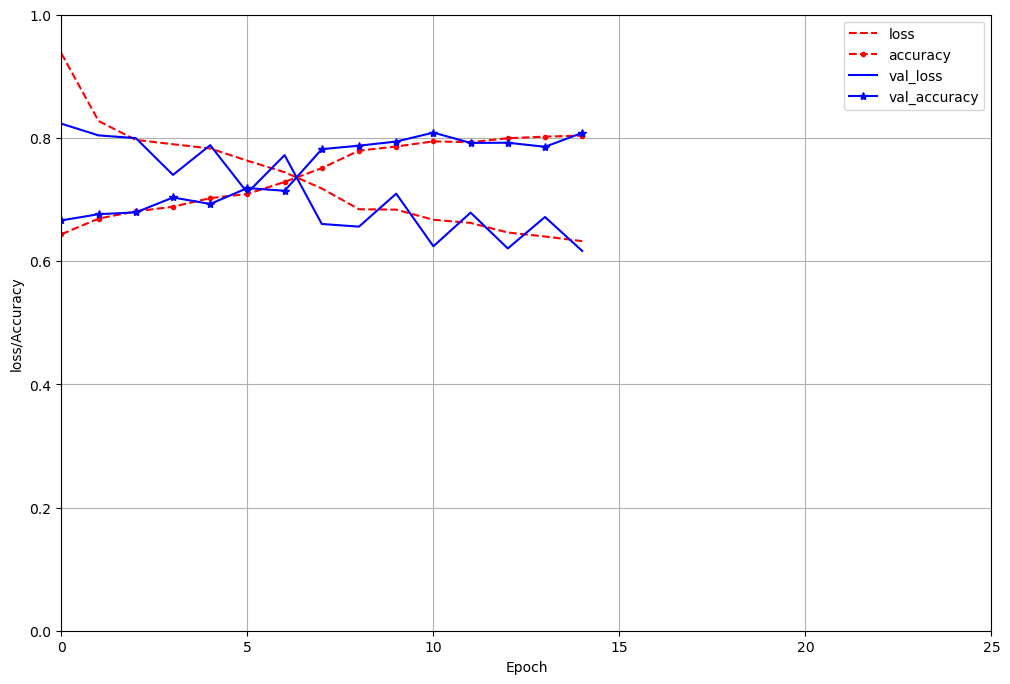

In [82]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(
    figsize=(12,8),
    xlim=[0,25],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    ylabel="loss/Accuracy",
    style=["r--","r--.","b-","b-*"]
)
plt.show()

# Using CLR

In [83]:
from keras.callbacks import *
from clr_callback import *
from keras.optimizers import Adam

In [84]:
tf.random.set_seed(42)
modelCLR = tf.keras.Sequential()

modelCLR.add(tf.keras.layers.Dense(units=100, input_dim=784, activation='softmax'))
modelCLR.add(tf.keras.layers.Dense(units=50, activation='softmax'))
modelCLR.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [85]:
#traingular learning rate policy and base_lr=0
clr_traingular = CyclicLR(mode="triangular")
modelCLR.compile(optimizer='Adam', 
              loss='categorical_crossentropy',
              metrics=["accuracy"]
              )

In [86]:
startTime = timeit.default_timer()
history = modelCLR.fit(X_train,y_train,
          validation_data=(X_test,y_test),
          epochs = 15,
          batch_size = 2000,
          callbacks=[clr_traingular],
          )
elapsedTime = timeit.default_timer() - startTime
print("Time taken for training the neural net: ", elapsedTime)

#Final Evaluation of the model
scores = modelCLR.evaluate(X_test,y_test)
print("Baseline ERROR: %.2f%%" % (100-scores[1]*100))

Epoch 1/15
30/30 [==============================] - 1s 14ms/step - loss: 2.3016 - accuracy: 0.1108 - val_loss: 2.2998 - val_accuracy: 0.1135
Epoch 2/15
30/30 [==============================] - 0s 9ms/step - loss: 2.2971 - accuracy: 0.1124 - val_loss: 2.2927 - val_accuracy: 0.1135
Epoch 3/15
30/30 [==============================] - 0s 8ms/step - loss: 2.2872 - accuracy: 0.1124 - val_loss: 2.2795 - val_accuracy: 0.1135
Epoch 4/15
30/30 [==============================] - 0s 9ms/step - loss: 2.2712 - accuracy: 0.1181 - val_loss: 2.2600 - val_accuracy: 0.1782
Epoch 5/15
30/30 [==============================] - 0s 9ms/step - loss: 2.2481 - accuracy: 0.2229 - val_loss: 2.2323 - val_accuracy: 0.2818
Epoch 6/15
30/30 [==============================] - 0s 9ms/step - loss: 2.2158 - accuracy: 0.3763 - val_loss: 2.1943 - val_accuracy: 0.5421
Epoch 7/15
30/30 [==============================] - 0s 8ms/step - loss: 2.1722 - accuracy: 0.6161 - val_loss: 2.1442 - val_accuracy: 0.7282
Epoch 8/15
30/30 [=

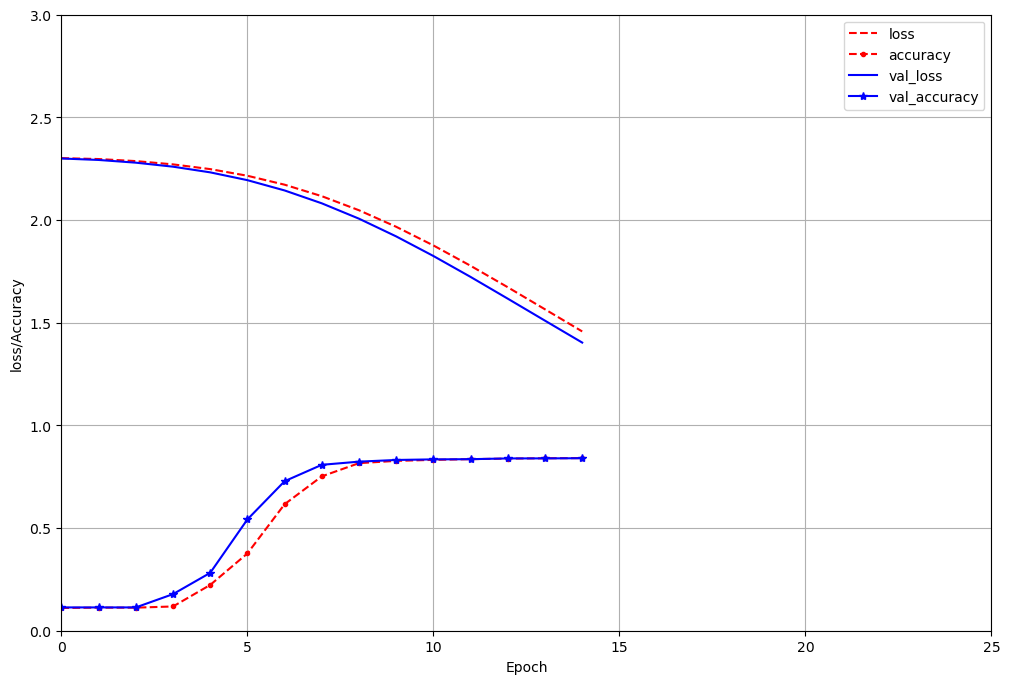

In [90]:
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(
    figsize=(12,8),
    xlim=[0,25],
    ylim=[0,1],
    grid=True,
    xlabel="Epoch",
    ylabel="Accuracy",
    style=["r--","r--.","b-","b-*"]
)
plt.show()

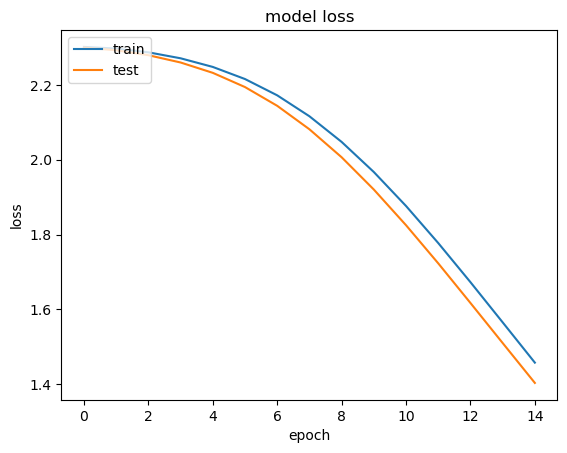

In [89]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()